In [55]:
import pandas as pd, numpy as np
import os, re
from contractions import CONTRACTION_MAP
import nltk
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import unicodedata
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [ ]:
# final_data taken from:  
# https://github.com/shekharkoirala/Game_of_Thrones
# get data for characters
def get_char_lines(char):    
    output = []          
    print('Getting lines for', char)        

    with open('./Data/final_data.txt', 'r',encoding='utf8') as f:
        for line in f:
            if re.findall(r'(^'+char+r'.*:.*)',line,re.IGNORECASE):
                output.append(line)
    f.close()
    print(char, 'has ', len(output), 'lines')
    return output


def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

In [112]:
def generate(char, img, all_ = False):

    # get lines using
    if not all_:
        text = get_char_lines(char)
    else:
        text = get_char_lines('')

    text = ' '.join(text)

    #move line info eg. JON:
    text = re.sub(r'.*:', '', text)

    #Remove brackets — remove any stage directions from the character lines
    text = re.sub('[\(\[].*?[\)\]]', ' ', text)

    #Remove accented characters and normalise using the unicodedata library
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

    #Expand any contracted words eg. do


    text = expand_contractions(text)

    text = text.lower()

    remove_digits = True

    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'    
    text = re.sub(pattern, '', text)

    text = text.replace('\n','')

    stopword_list = stopwords.words('english')    
    tokens = nltk.word_tokenize(text)    
    tokens = [token.strip() for token in tokens]    
    text = ' '.join([token for token in tokens if token not in stopword_list])

    char_mask = np.array(Image.open(img))    
    image_colors = ImageColorGenerator(char_mask)

    wc = WordCloud(background_color="white", max_words=2000, width=800, height=800, mask=char_mask, random_state=1,min_font_size = 4, max_font_size = 100).generate(text)
    # to recolour the image
    plt.figure(figsize=(30,20))
    plt.imshow(wc.recolor(color_func=image_colors))

Getting lines for arya
arya has  776 lines


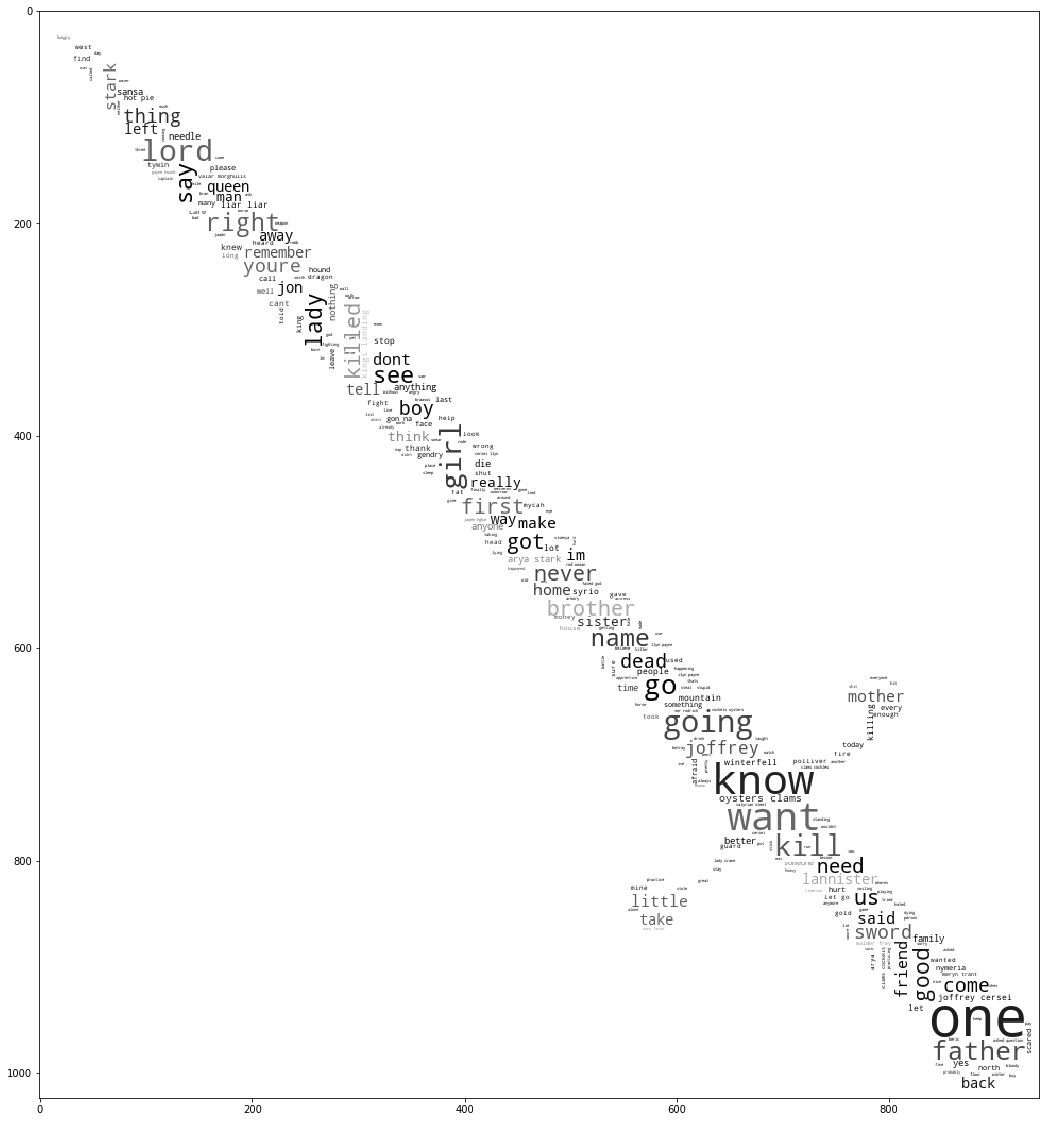

In [113]:
generate('arya', img = './images/sword.jpg')#, all_ = True)